
@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/-VuR14Qyl7E

# Escala, Normaliza & Estandariza

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing 

In [4]:
datos = pd.read_csv("H:\FIUBA 2013\ORGANICION DE DATOS\Machine Learning - Organizacion de datos\Datasets\datos_personas.csv")
datos

,ingreso,carros
0,22273.577534,3
1,8961.047249,1
2,7437.977263,2
3,12064.915290,2
4,9296.396167,1
...,...,...
995,9998.522402,0
996,6867.097603,2
997,9757.539280,1
998,11044.031510,1


# Graficando los datos en escala original 

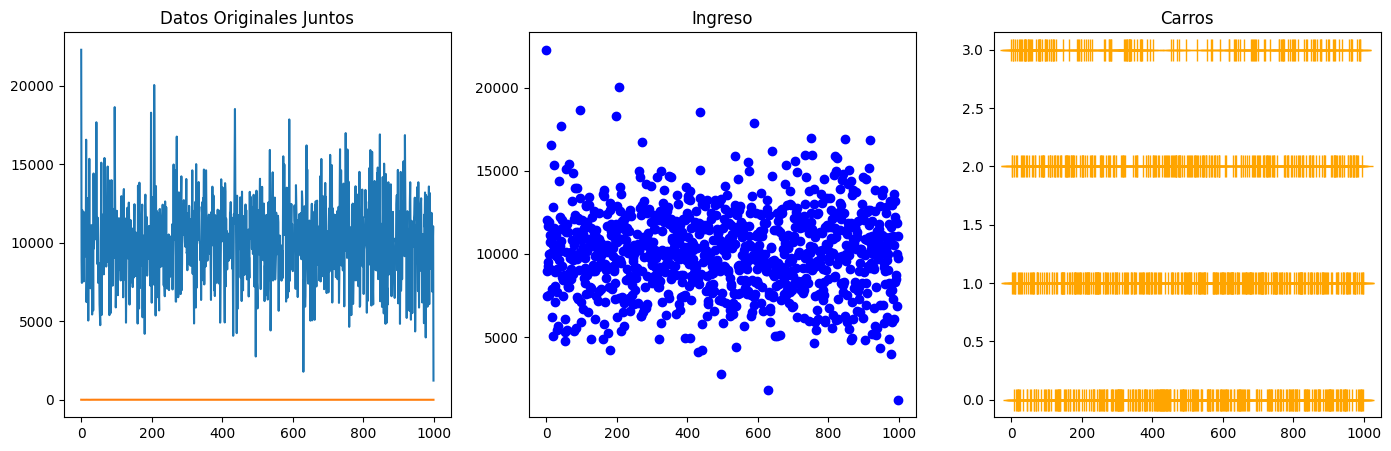

In [6]:
fig = plt.figure(figsize=(17, 5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.set_title("Datos Originales Juntos")
ax1.plot(datos)

ax2.set_title("Ingreso")
ax2.plot(datos["ingreso"], linewidth=0, marker="o", color="blue", markersize=6)

ax3.set_title("Carros")
ax3.plot(datos["carros"], linewidth=0, marker="+", color="orange", markersize=16)

plt.show()

# Distribución de los datos originales

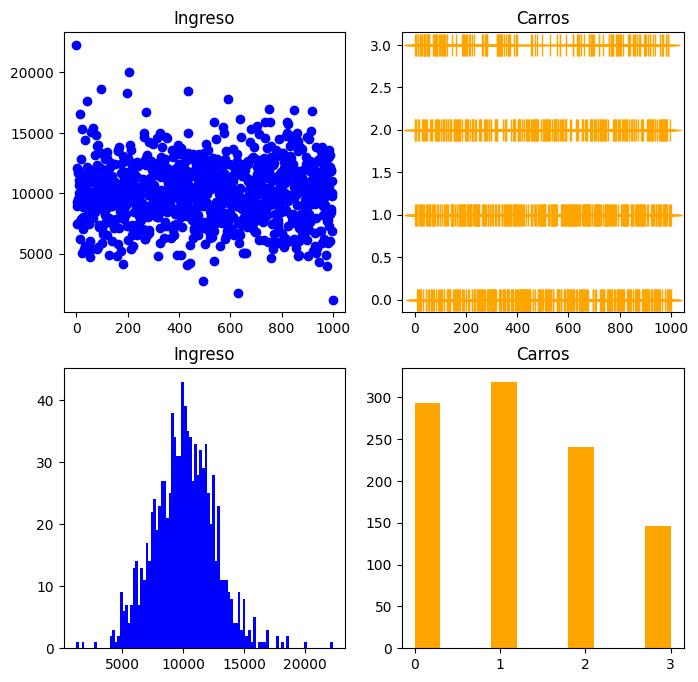

In [7]:
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.set_title("Ingreso")
ax1.plot(datos["ingreso"], linewidth=0, marker="o", color="blue", markersize=6)

ax2.set_title("Carros")
ax2.plot(datos["carros"], linewidth=0, marker="+", color="orange", markersize=16)

ax3.set_title("Ingreso")
ax3.hist(datos["ingreso"], bins=100, color="blue")

ax4.set_title("Carros")
ax4.hist(datos["carros"], color="orange")

plt.show()

# Escala en función del mínimo y máximo

Fórmula:
$$x_{scaled} = \frac{x - x_{min}}{x_{max}- x_{min}}$$

In [11]:
datos_min_max = preprocessing.MinMaxScaler().fit_transform(datos)

datos_min_max

array([[1.        , 1.        ],
       [0.36761553, 0.33333333],
       [0.29526521, 0.66666667],
       ...,
       [0.40545125, 0.33333333],
       [0.46656343, 0.33333333],
       [0.        , 0.        ]])

# Normaliza en función de la Norma del Vector

Recorcardar que lo hace por fila, por eso transponemos los datos.
$$x_{norm} = \frac{x}{\sqrt{x^2_1+x^2_2+x^2_3 +... + x^2_n}}$$

In [8]:
datos_normalizer = preprocessing.Normalizer().transform(datos.T)
datos_normalizer = datos_normalizer.T
# normalizado = X / raíz_cuadrada( X_1^2 + X_2^2 + X_3^2 + ...)

datos_normalizer

array([[0.06777903, 0.05886881],
       [0.02726868, 0.01962294],
       [0.02263394, 0.03924588],
       ...,
       [0.02969242, 0.01962294],
       [0.03360725, 0.01962294],
       [0.00371935, 0.        ]])

# Estandariza (desv_std = 1, media = 0)

Fórmula:
$$ Z = \frac{X -\mu}{\sigma}$$
- $\mu$: media muestral
- $\sigma$: desvio estandar

In [9]:
datos_standard_scaler = preprocessing.StandardScaler().fit_transform(datos)
# estandarizado = (X - media) / std

datos_robust_scaler = preprocessing.RobustScaler().fit_transform(datos)
# estandarizado = (X - rango_intercuartílico) / std

datos_standard_scaler, datos_robust_scaler

(array([[ 4.81555174,  1.70892042],
        [-0.4413019 , -0.23193185],
        [-1.04273197,  0.73849429],
        ...,
        [-0.12678303, -0.23193185],
        [ 0.38122719, -0.23193185],
        [-3.49719763, -1.20235798]]),
 array([[ 3.70548334,  1.        ],
        [-0.3376601 ,  0.        ],
        [-0.80023109,  0.5       ],
        ...,
        [-0.09575781,  0.        ],
        [ 0.29496225,  0.        ],
        [-2.68800607, -0.5       ]]))

# Columna 'ingreso': Comparación de métodos

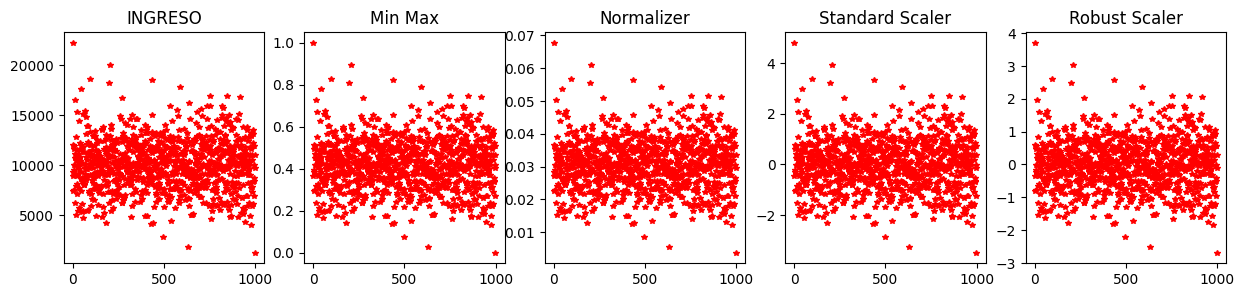

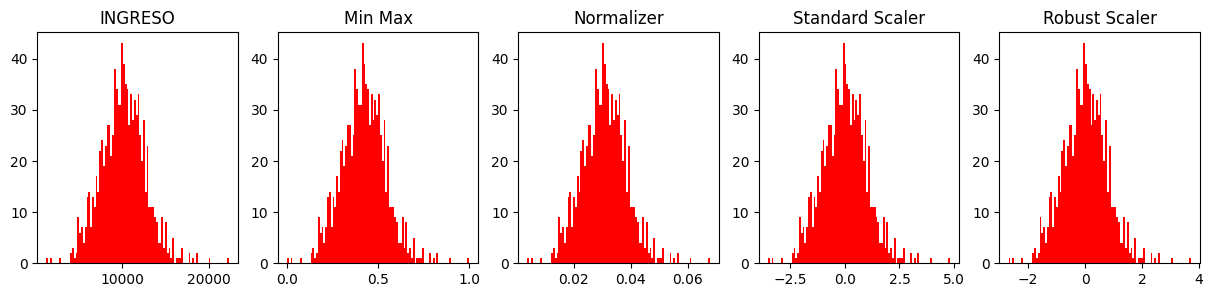

In [17]:
# convierte vectores de numpy a DataFrames para graficarlos
datos_min_max = pd.DataFrame(datos_min_max, columns=["ingreso", "carros"])
datos_normalizer = pd.DataFrame(datos_normalizer, columns=["ingreso", "carros"])
datos_standard_scaler = pd.DataFrame(datos_standard_scaler, columns=["ingreso", "carros"])
datos_robust_scaler = pd.DataFrame(datos_robust_scaler, columns=["ingreso", "carros"])

# crea una figura con 5 subfiguras para comparar los métodos
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# crea y personaliza series de datos
ax1.set_title("INGRESO")
ax1.plot(datos["ingreso"], linewidth=0, marker="*", color="red", markersize=4)

ax2.set_title("Min Max")
ax2.plot(datos_min_max["ingreso"], linewidth=0, marker="*", color="red", markersize=4)

ax3.set_title("Normalizer")
ax3.plot(datos_normalizer["ingreso"], linewidth=0, marker="*", color="red", markersize=4)
#ax3.set_ylim(0, 1)

ax4.set_title("Standard Scaler")
ax4.plot(datos_standard_scaler["ingreso"], linewidth=0, marker="*", color="red", markersize=4)

ax5.set_title("Robust Scaler")
ax5.plot(datos_robust_scaler["ingreso"], linewidth=0, marker="*", color="red", markersize=4)

plt.show()

# crea una figura con 5 subfiguras para mostrar histogramas
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# crea y personaliza series de datos de los histogramas
ax1.set_title("INGRESO")
ax1.hist(datos["ingreso"], color="red", bins=100)

ax2.set_title("Min Max")
ax2.hist(datos_min_max["ingreso"], color="red", bins=100)

ax3.set_title("Normalizer")
ax3.hist(datos_normalizer["ingreso"], color="red", bins=100)

ax4.set_title("Standard Scaler")
ax4.hist(datos_standard_scaler["ingreso"], color="red", bins=100)

ax5.set_title("Robust Scaler")
ax5.hist(datos_robust_scaler["ingreso"], color="red", bins=100)

plt.show()

# Columna 'carros': Comparación de métodos

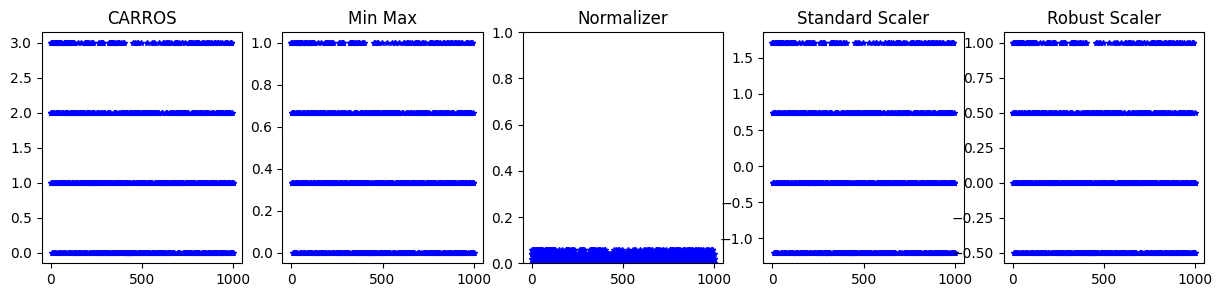

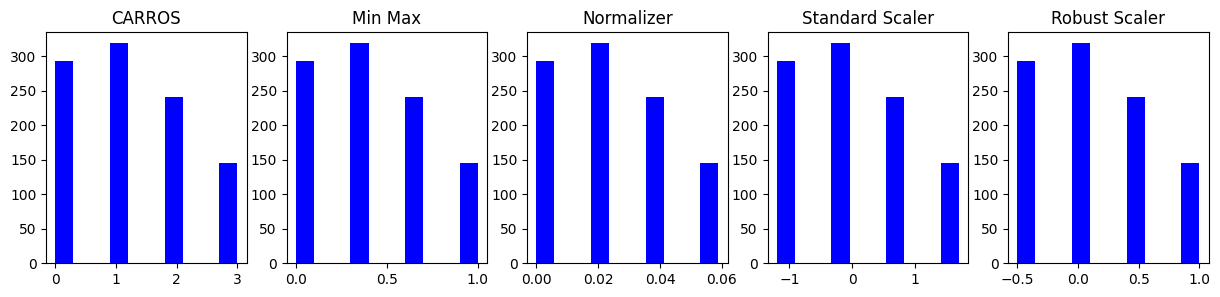

In [16]:
# crea una figura con 5 subfiguras para comparar los métodos
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# crea y personaliza series de datos
ax1.set_title("CARROS")
ax1.plot(datos["carros"], linewidth=0, marker="*", color="blue", markersize=4)

ax2.set_title("Min Max")
ax2.plot(datos_min_max["carros"], linewidth=0, marker="*", color="blue", markersize=4)

ax3.set_title("Normalizer")
ax3.plot(datos_normalizer["carros"], linewidth=0, marker="*", color="blue", markersize=4)
ax3.set_ylim(0, 1)

ax4.set_title("Standard Scaler")
ax4.plot(datos_standard_scaler["carros"], linewidth=0, marker="*", color="blue", markersize=4)

ax5.set_title("Robust Scaler")
ax5.plot(datos_robust_scaler["carros"], linewidth=0, marker="*", color="blue", markersize=4)

plt.show()

# crea una figura con 5 subfiguras para mostrar histogramas
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# crea y personaliza series de datos de los histogramas
ax1.set_title("CARROS")
ax1.hist(datos["carros"], color="blue")

ax2.set_title("Min Max")
ax2.hist(datos_min_max["carros"], color="blue")

ax3.set_title("Normalizer")
ax3.hist(datos_normalizer["carros"], color="blue")

ax4.set_title("Standard Scaler")
ax4.hist(datos_standard_scaler["carros"], color="blue")

ax5.set_title("Robust Scaler")
ax5.hist(datos_robust_scaler["carros"], color="blue")

plt.show()

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>